In [2]:
from ivanoscience import *
import pandas as pd
df_train = pd.read_csv(f'{raw}/train.csv')

In [3]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [4]:
from joblib import Memory
memory = Memory(location='./cache', verbose=10)

In [5]:
@memory.cache
def pca(X, **args):
    t = PCA(**args)
    return t.fit_transform(X)

In [7]:
pixels_train = df_train.loc[:, 'pixel0':'pixel783']

In [8]:
pca_pixels_train = pca(pixels_train, n_components=20)

[Memory]27.2s, 0.5min   : Loading pca from ./cache/joblib/__main__--Users-ivan/sobolev-opower-data-sci-fience-digit-recognizer-__ipython-input__/pca/27babd3cb18666c40c4c4275e6e49980
_________________________________________________pca cache loaded - 0.0s, 0.0min


In [9]:
@memory.cache
def tsne_multicore(X, **args):
    from MulticoreTSNE import MulticoreTSNE
    tsne = MulticoreTSNE(n_jobs=-1)
    return tsne.fit_transform(X)

In [15]:
tsne_pixels_train = tsne_multicore(pca_pixels_train)

________________________________________________________________________________
[Memory] Calling __main__--Users-ivan.sobolev-opower-data-sci-fience-digit-recognizer-__ipython-input__.tsne_multicore...
tsne_multicore(array([[-661.59578 , ...,  216.598684],
       ...,
       [-364.249199, ...,  -18.075746]]))
_________________________________________________tsne_multicore - 386.8s, 6.4min


In [16]:
%matplotlib inline
import seaborn as sns

In [17]:
import matplotlib.pyplot as plt

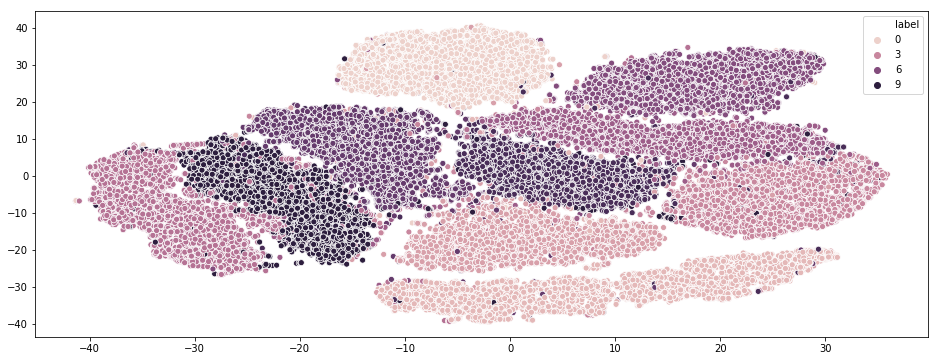

In [18]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x=tsne_pixels_train[:,0], y=tsne_pixels_train[:,1], hue=df_train['label'])

In [ ]:
# Note to self: not much of a speedup in this case (original is on the order of 5 mins too)